/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


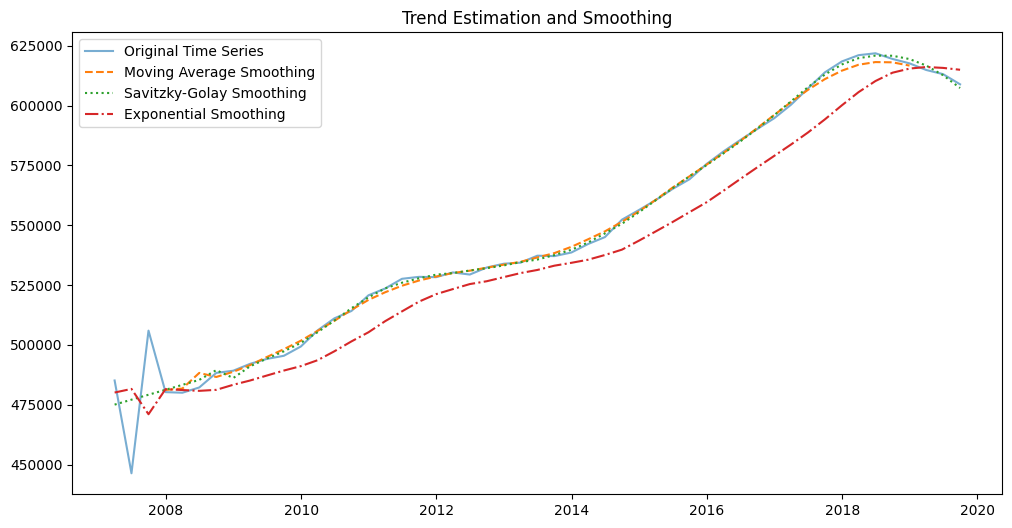

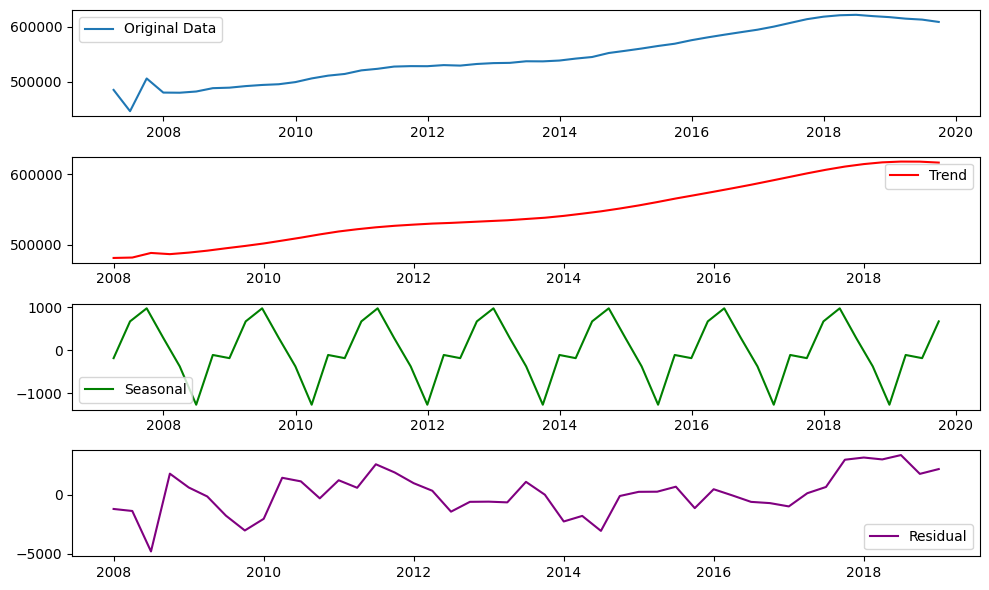

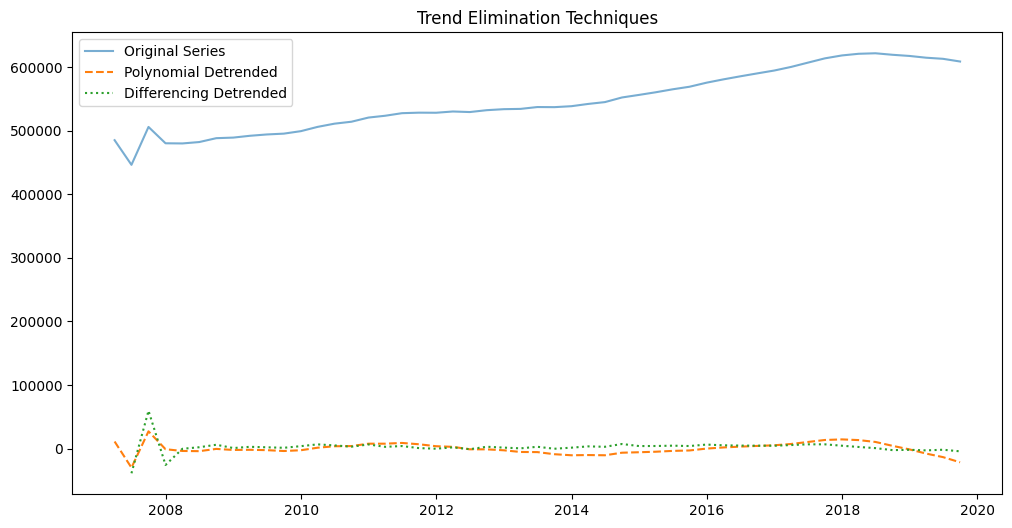

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Load dataset
df = pd.read_csv("/content/ma_lga_12345.csv")

# Convert 'saledate' to datetime format and sort data
df['saledate'] = pd.to_datetime(df['saledate'], format="%d/%m/%Y")
df = df.sort_values('saledate')

# Aggregate data by date (if multiple values per date)
df = df.groupby('saledate', as_index=False)['MA'].mean()

# Ensure the index is datetime for time series processing
df.set_index('saledate', inplace=True)

# Define the time series
series = df['MA']

# Moving Average Smoothing
def moving_average_smoothing(series, window=7):
    return series.rolling(window=window, center=True).mean()

# Savitzky-Golay Smoothing
def savitzky_golay_smoothing(series, window=11, poly_order=2):
    return pd.Series(savgol_filter(series, window_length=window, polyorder=poly_order), index=series.index)

# Simple Exponential Smoothing
def simple_exponential_smoothing(series, alpha=0.3):
    model = SimpleExpSmoothing(series, initialization_method='estimated')
    fit = model.fit(smoothing_level=alpha)
    return fit.fittedvalues

# Difference Detrending
def difference_detrending(series, lag=1):
    return series.diff(lag).dropna()

# Polynomial Detrending
def polynomial_detrending(series, degree=2):
    x = np.arange(len(series))
    coeffs = np.polyfit(x, series, degree)
    trend = np.polyval(coeffs, x)
    return series - trend

# Decomposition Plot
def decompose_and_plot(series, model='additive'):
    decomposition = seasonal_decompose(series, model=model, period=7)

    plt.figure(figsize=(10, 6))

    plt.subplot(4, 1, 1)
    plt.plot(series, label='Original Data')
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Trend', color='red')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Seasonal', color='green')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Residual', color='purple')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Plot original and smoothed series
    plt.figure(figsize=(12, 6))
    plt.plot(series, label='Original Time Series', alpha=0.6)
    plt.plot(moving_average_smoothing(series), label='Moving Average Smoothing', linestyle='dashed')
    plt.plot(savitzky_golay_smoothing(series), label='Savitzky-Golay Smoothing', linestyle='dotted')
    plt.plot(simple_exponential_smoothing(series), label='Exponential Smoothing', linestyle='dashdot')
    plt.legend()
    plt.title('Trend Estimation and Smoothing')
    plt.show()

    # Decompose and visualize components
    decompose_and_plot(series)

    # Plot original and detrended series
    plt.figure(figsize=(12, 6))
    plt.plot(series, label='Original Series', alpha=0.6)
    plt.plot(polynomial_detrending(series), label='Polynomial Detrended', linestyle='dashed')
    plt.plot(difference_detrending(series), label='Differencing Detrended', linestyle='dotted')
    plt.legend()
    plt.title('Trend Elimination Techniques')
    plt.show()

if __name__ == "__main__":
    main()
